# Homework #5  (Due 26 December 2022)

## Part-1

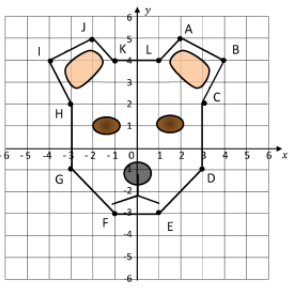

You will be applying a transformation on a set of points of the following image (50%).
<br>
a) Find the matrix that represents a rotation of 20 degrees in homogeneous coordinates. Perform a rotation of 20 degrees on the points and plot them. <br>
b) Find the matrix  that represents a translation of 2 in x direction, 1 in y direction degrees in homogeneous coordinates. Perform a translation in x of 2 and a translation in y of 1 over the points previously rotated. Plot the new obtained points.<br>
c) Find a transform that represents the operation of rotation of 20 degrees followed by a translation. Compare with the points on (b) and verify with a plot the match.<br>
d) Define a matrix that represents a translation of 2 in x and a translation of 1 in y, followed by a rotation of 20 degrees. Do the transformation over the initial set of points and plot.<br> 
e) Are the matrices obtained in (c) and (d) the same? Why?<br>

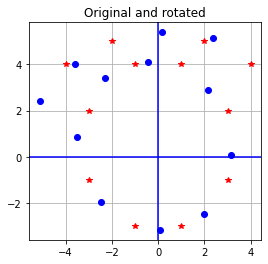

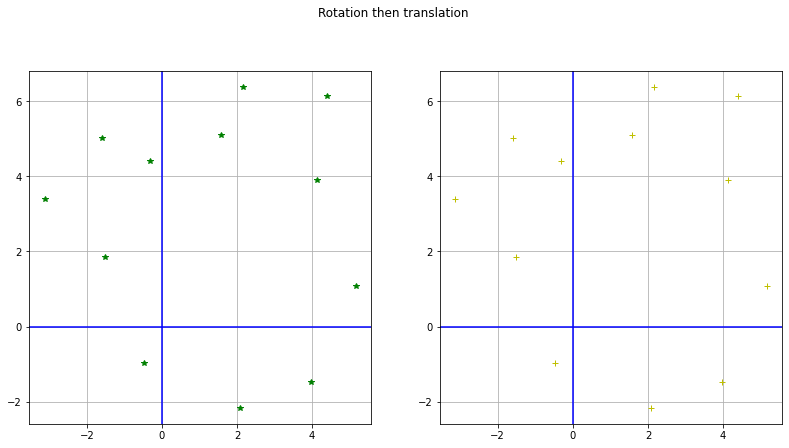

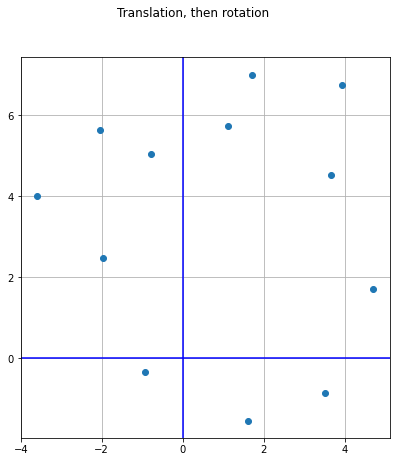

In [ ]:
#import needed libraries
import numpy as np
import matplotlib.pyplot as plt

# define your points 
points = np.array([[2,5],[4,4],[3,2],[3,-1],[1,-3],[-1,-3],[-3,-1],[-3,2],[-4,4],[-2,5],[-1,4],[1,4]])

# represent your points in homogeneous coordinates (3 coordinates).
homogenous_points = np.insert(points, 2, 1, axis=1)

# make the points be in columns (you need to transpose them)
transposed_matrix = np.transpose(homogenous_points)

rotation = np.pi/9 # rotation for 20 degrees

# define your rotation matrix here:
R = np.array([[np.cos(rotation), -(np.sin(rotation)), 0],
             [np.sin(rotation), np.cos(rotation), 0],
             [0, 0, 1]])

# set up your plot
fig, ax = plt.subplots(1)
ax.clear()
ax.grid(True)
ax.set_aspect('equal')
ax.axhline(0, color='blue')   #draw x axis
ax.axvline(0, color='blue')   #draw y axis

# Plot original points to see everything looks correct
ax.plot(transposed_matrix[0, :], transposed_matrix[1, :], 'r*')

# do the rotation
# you can use np.matmul
rotPoints = np.matmul(R, transposed_matrix) # rotated points

plt.plot(rotPoints[0,:],rotPoints[1,:],'bo')
plt.title('Original and rotated')
plt.show()

# define your translation matrix here:
T= np.array([[1, 0, 2],[0, 1, 1],[0,0,1]]) # tx = 2, #ty = 1

# translation + rotation
fig, ax = plt.subplots(ncols=2, figsize=(13.5, 7))
fig.suptitle('Rotation then translation')
#subplot 1
ax[0].clear()
ax[0].grid(True)
ax[0].axhline(0, color='blue')
ax[0].axvline(0, color='blue')
ax[0].set_aspect('equal')

#subplot 2
ax[1].clear()
ax[1].grid(True)
ax[1].axhline(0, color='blue')
ax[1].axvline(0, color='blue')
ax[1].set_aspect('equal')

# Compute translation over your rotated points
tRotPoints = np.matmul(T, rotPoints) # first rotated, then translated

ax[0].plot(tRotPoints[0,:],tRotPoints[1,:],'g*')

# Compute a single matrix for your rotation and translation
tR = np.matmul(T,R) # first rotate, then translate, combined

# Transform your points with a single matrix
tRotPoints2 = np.matmul(tR, transposed_matrix)
#plot points
ax[1].plot(tRotPoints2[0,:],tRotPoints2[1,:],'y+')
# plt.show()

#Also compute rotation followed by translation, and plot, and comment (d and e)

fig2, ax2 = plt.subplots(ncols=1, figsize=(13.5, 7))
fig2.suptitle('Translation, then rotation')

ax2.clear()
ax2.grid(True)
ax2.axhline(0, color='blue')
ax2.axvline(0, color='blue')
ax2.set_aspect('equal')

rT = np.matmul(R,T)

tRotPoints3 = np.matmul(rT, transposed_matrix)

ax2.plot(tRotPoints3[0, :], tRotPoints3[1, :], 'o')
plt.show()

The first image represents the twenty degrees of rotation.
On the second row, we are able to see the affect of first rotation, then the translation. These images correspond to the items b and c. As it can be observed, both of the output images are the same. This is because of the associative property of the matrix multiplication. Considering a matrix multiplication of R * T * M Multiplying first with R and T and then multiplying the result with M is the same with first T and M, and then R and the result. When dealing with huge matrices, it is preferable to construct the transformation matrix before it is multiplied with the image to reduce the number of the operations, consequently also the computational cost.

e)
However, since matrix multiplication does not possess the property of commutativity, the order of the terms that are being multiplied matter. This change can be observed in the final image, translating first and then rotating the image (simply put, changing the order of the terms) will affect the resuilting image. (Notice how lowest point on the previous images had a value lower than -2 on y axis, and the last image has a higher value for that point on y axis, it is located a bit higher.) Therefore, the results are **NOT** the same

## Part-2

Now you will be doing warping with forward mapping for an image and will be implementing a nearest neighbor interpolation (50%).

a) Use the following homography matrix for forward warping of the grid points:  <br>
H=[[-2.90978069e+00,  3.54859237e-02,  1.70029144e+03],<br>
   [-6.48857919e-01, -8.36844934e-01,  6.24249500e+02],<br>
   [-2.10617311e-03,  8.27414761e-06,  1.00000000e+00]]<br>
 <br> 
b) Visualize the obtained warped image in the range from 0 to 1000 in x and y. Comment about the appearance of the image. Does the image have gaps?<br>
c) Implement a forward nearest neighbor interpolation in the warped image. Visualize the interpolated image. Comment about the appereance of the interpolated image versus the initially warped image in (b).

In [ ]:
from skimage.io import imread
from skimage.color import rgb2gray

# load an image to warp
img = imread("https://raw.githubusercontent.com/cvrg-iyte/cvrg-iyte.github.io/master/assets/img/img2warp.jpg")

In [ ]:
# the values that can take y
i = np.linspace(0, img.shape[0]-1, img.shape[0]).astype(int)
# the values that can take x
j = np.linspace(0, img.shape[1]-1, img.shape[1]).astype(int)
# combination of values that can take x, and y in a grid
yv, xv = np.meshgrid(i, j)

# number of points on the grid
numpoints = xv.ravel().shape[0]
# Note: ravel() returns contiguous flattened array (1D array with all the 
# input-array elements and with the same type as it). 

# extract the color channels
r = img[yv.ravel(),xv.ravel(),0]
g = img[yv.ravel(),xv.ravel(),1]
b = img[yv.ravel(),xv.ravel(),2]

# Define Homography matrix 
H=np.array([[-2.90978069e+00,  3.54859237e-02,  1.70029144e+03],
            [-6.48857919e-01, -8.36844934e-01,  6.24249500e+02],
            [-2.10617311e-03,  8.27414761e-06,  1.00000000e+00]]
)

# all the values of x coordinates as a row
x_cord = xv.ravel().reshape((1,numpoints))
# all the values of y coordinates as a row
y_cord = yv.ravel().reshape((1,numpoints))

# define the homogeneous coordinates
grid = np.concatenate((x_cord, y_cord, np.ones((1,numpoints))),axis=0)

# transform the grid (your canvas) in the new coordinated determined by the homography defined below
newgrid = np.matmul(H, grid)

newgridHetero = np.zeros((newgrid.shape[0]-1, newgrid.shape[1]))
# Convert from homogeneous to heterogeneous coordinates
# TO DO: complete the conversion. remember x=X/w
newgridHetero[0:, ] = np.divide(newgrid[0], newgrid[2])
newgridHetero[1:, ] = np.divide(newgrid[1], newgrid[2])

# Raw approximation. You can round your newgridHetero values to closest integer
a = np.array(newgridHetero)
newgrid2 = (np.round(a, decimals=0)).astype(np.int64)

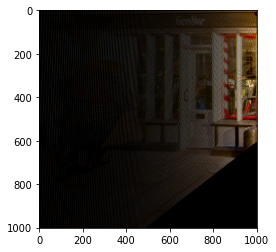

In [ ]:
# define your new empty canvas (it will have -1 if is not defined)
warped = -np.ones((1001,1001,3)).astype(np.int16)

# only consider points that are in your area of interest (0 to 1000)
validsX=np.bitwise_and(newgrid2[0,:]>=0,newgrid2[0,:]<1000)
validsY=np.bitwise_and(newgrid2[1,:]>=0,newgrid2[1,:]<1000)
valids = np.bitwise_and(validsX,validsY)

# assign color to the pixels that are valids
warped[newgrid2[1,valids],newgrid2[0,valids],0]=r[valids]
# TO DO: ASSIGN the remaining colors

warped[newgrid2[1, valids], newgrid2[0, valids], 1] = g[valids]
warped[newgrid2[1, valids], newgrid2[0, valids], 2] = b[valids]

plt.imshow(warped)
plt.show()

The image has gaps after the forward mapping, especially towards the left of the image. Also there are wave like gaps everywhere in the image like the letter U (I have observed it in Visual Studio Code, here it is a bit small to notice but still visible). This is because not every coordinate has a pixel assigned after forward mapping

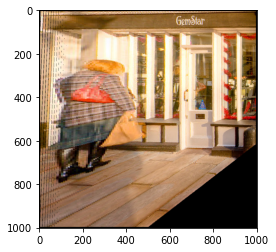

In [ ]:
# Nearest Neighbor interpolation
#(code below is not forward or backward mapping, we just make the pixels in 'warped' cover a larger area)

# You dont need to change anything in the code below

# your new canvas
warped2 = np.zeros((1001,1001,3)).astype(np.uint8)
# Area where we look for closest valid assignation
area2check=5

# loop over the valid area of the warped image
for i in range(area2check,warped.shape[0]-area2check):
    for j in range(area2check,warped.shape[1]-area2check):
        # check if the pixel has a valid warped value        
        if warped[i,j,0]==-1:  #need to look for neighbor
            distance = area2check*area2check+1  # assign a distance larger than any that can be found in the area to check
            
            # loop over all the possible neighbors
            for k in range(i-area2check,i+area2check):
                for l in range(j-area2check,j+area2check):
                    distancetested = (abs(k-i)+abs(l-j))  # L1 distance
                    if warped[k,l,0]>=0 and distancetested<distance:    # found a warped point , and it is closest
                        distance=distancetested
                        warped2[i,j]=warped[k,l]
        else:  #assign the valid warping
            warped2[i,j] =warped[i,j]
            
        
plt.imshow(warped2)
plt.show()


This is the result after applying the nearest neighber interpolation, here, there are still small gaps near the left edge, seeming as dashed lines but the image seems a lot better than the previous one. Almost all gaps are filled using the nearest pixel in the destination image, when a gap is found, the value of the nearest pixel that is valid is also used to fill the gap.

Using backward mapping (which we didn't apply in this assignment) is preferred instead of forward mapping for this reason, because instead of mapping the source image pixels to the destination image (which leads to gaps since some pixels fall in between after homography is applied), every pixel in the destination image gets their value from the source, not letting any gaps to happen to begin with.